# Breast Cancer Machine Learning Model

## Introduction

Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area

## What is the function of machine learning for breast cancer? 

The function of machine learning for breast cancer is so that health workers can predict the disease suffered by the patient, whether the patient has benign or malignant breast cancer, so that it can make it easier for health workers to treat patients

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
print("No of Column : ", df.shape[1])
print("No of Row : ", df.shape[0])

No of Column :  32
No of Row :  569


In [5]:
df.duplicated().sum()

0

In [6]:
# check missing value with persentase
def chek_missing(df):
    sum_nan = df.isnull().sum().reset_index()
    sum_nan.columns = ['kolom', 'jumlah_NaN']
    sum_nan["persentase"] = sum_nan.jumlah_NaN/len(df)*100
    return sum_nan.sort_values("persentase", ascending =  False)
chek_missing(df)

,kolom,jumlah_NaN,persentase
0,id,0,0.0
1,diagnosis,0,0.0
30,symmetry_worst,0,0.0
29,concave_points_worst,0,0.0
28,concavity_worst,0,0.0
27,compactness_worst,0,0.0
26,smoothness_worst,0,0.0
25,area_worst,0,0.0
24,perimeter_worst,0,0.0
23,texture_worst,0,0.0


In [7]:
print("Distribusi Label (Diagnosis) : \n", df['diagnosis'].value_counts())

Distribusi Label (Diagnosis) : 
 B    357
M    212
Name: diagnosis, dtype: int64


<AxesSubplot:title={'center':'Correlation Heatmap'}>

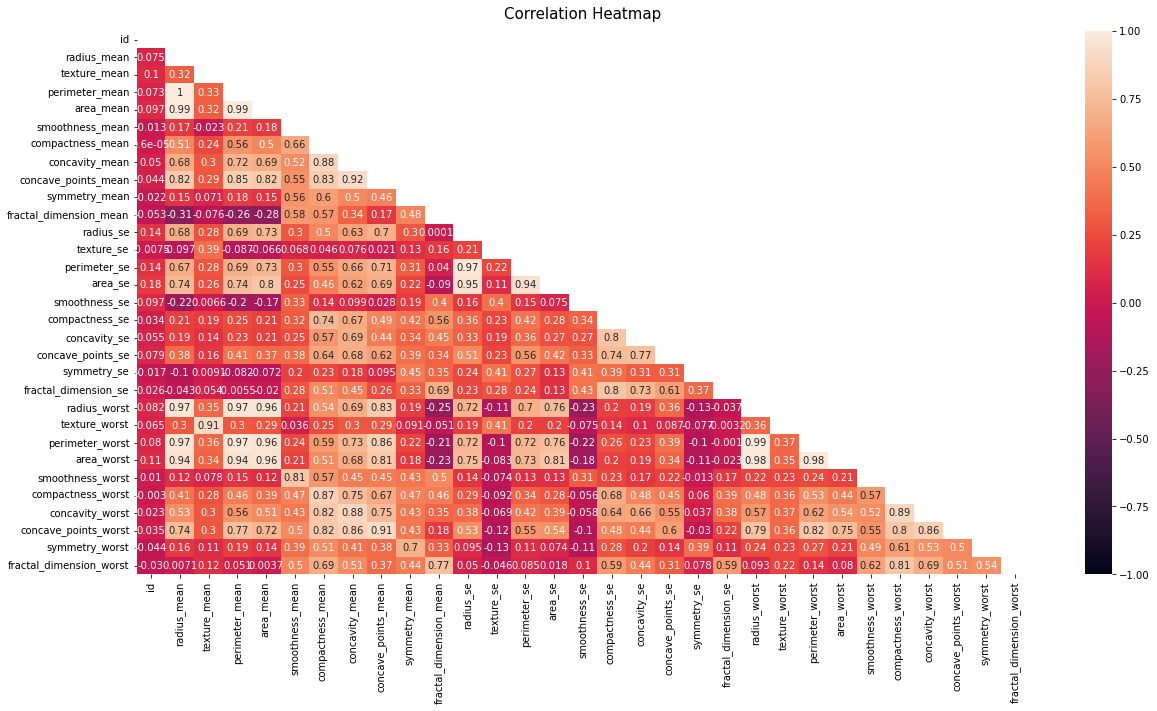

In [8]:
def corr_plot(df2, metode):
  plt.figure(figsize=(20,10))
  triangle = np.triu(np.ones_like(df2.corr(method = metode)))
  heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True, mask = triangle)
  heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=12)
  return heatmap
corr_plot(df, "spearman")

In [9]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

C:\Users\DIMASD~1\AppData\Local\Temp/ipykernel_23932/2772442783.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [10]:
to_drop_hicorr

['perimeter_mean',
 'area_mean',
 'concavity_mean',
 'concave_points_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'compactness_se',
 'concavity_se',
 'concave_points_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave_points_worst',
 'fractal_dimension_worst']

In [11]:
df.drop(to_drop_hicorr, axis=1, inplace=True)

In [12]:
df.drop('id', axis=1, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   smoothness_mean         569 non-null    float64
 4   compactness_mean        569 non-null    float64
 5   symmetry_mean           569 non-null    float64
 6   fractal_dimension_mean  569 non-null    float64
 7   texture_se              569 non-null    float64
 8   smoothness_se           569 non-null    float64
 9   symmetry_se             569 non-null    float64
 10  symmetry_worst          569 non-null    float64
dtypes: float64(10), object(1)
memory usage: 49.0+ KB


In [14]:
df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,symmetry_se,symmetry_worst
0,M,17.99,10.38,0.11840,0.27760,0.2419,0.07871,0.9053,0.006399,0.03003,0.4601
1,M,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.7339,0.005225,0.01389,0.2750
2,M,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7869,0.006150,0.02250,0.3613
3,M,11.42,20.38,0.14250,0.28390,0.2597,0.09744,1.1560,0.009110,0.05963,0.6638
4,M,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7813,0.011490,0.01756,0.2364


In [15]:
cat_col = [col for col in df.select_dtypes(include='object').columns.tolist()]

In [16]:
y = pd.get_dummies(df[cat_col], drop_first=True)
y.head()

,diagnosis_M
0,1
1,1
2,1
3,1
4,1


In [17]:
numerical_cols = [col for col in df.columns.tolist() if col not in cat_col]

In [18]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X = pd.DataFrame(ss.fit_transform(df[numerical_cols]), columns=numerical_cols)
X.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,symmetry_se,symmetry_worst
0,1.097064,-2.073335,1.568466,3.283515,2.217515,2.255747,-0.565265,-0.214002,1.148757,2.750622
1,1.829821,-0.353632,-0.826962,-0.487072,0.001392,-0.868652,-0.876244,-0.605351,-0.805450,-0.243890
2,1.579888,0.456187,0.942210,1.052926,0.939685,-0.398008,-0.780083,-0.297005,0.237036,1.152255
3,-0.768909,0.253732,3.283553,3.402909,2.867383,4.910919,-0.110409,0.689702,4.732680,6.046041
4,1.750297,-1.151816,0.280372,0.539340,-0.009560,-0.562450,-0.790244,1.483067,-0.361092,-0.868353


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
print('shape of X_test : ',X_test.shape)
print('shape of X_train : ',X_train.shape)
print('shape of Y_test : ',y_test.shape)
print('shape of Y_train : ',y_train.shape)

shape of X_test :  (114, 10)
shape of X_train :  (455, 10)
shape of Y_test :  (114, 1)
shape of Y_train :  (455, 1)


#### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
# Call the classifier
logreg = LogisticRegression()
# Fit the classifier to the training data  
logreg = logreg.fit(X_train, y_train)
#Training Model: Predict 
y_pred = logreg.predict(X_test)

C:\Users\Dimas Dwi A\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [23]:
print('Training Accuracy :', logreg.score(X_train, y_train))
print('Testing Accuracy :', logreg.score(X_test, y_test))

Training Accuracy : 0.9582417582417583
Testing Accuracy : 0.956140350877193


#### Decision Tree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
# Call the classifier
decision_tree = DecisionTreeClassifier()
# Fit the classifier to the training data
decision_tree = decision_tree.fit(X_train, y_train)
#Training Model: Predict 
y_pred2 = logreg.predict(X_test)

In [25]:
print('Training Accuracy :', decision_tree.score(X_train, y_train))
print('Testing Accuracy :', decision_tree.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.868421052631579


#### lightgbm

In [26]:
import lightgbm as lgb
# Call the lightgbm model
clf = lgb.LGBMClassifier()
# Fit the classifier to the training data
clf = clf.fit(X_train, y_train)
#Training Model: Predict 
y_pred3 = clf.predict(X_test)

C:\Users\Dimas Dwi A\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [27]:
print('Training Accuracy :', clf.score(X_train, y_train))
print('Testing Accuracy :', clf.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.9298245614035088


In [28]:
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [30]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [31]:
print('Precision score %s' % precision_score(y_test, y_pred))
print('Recall score %s' % recall_score(y_test, y_pred))
print('F1-score score %s' % f1_score(y_test, y_pred))
print('Accuracy score %s' % accuracy_score(y_test, y_pred))

Precision score 0.9523809523809523
Recall score 0.9302325581395349
F1-score score 0.9411764705882352
Accuracy score 0.956140350877193


In [32]:
arr_feature_coef = logreg.coef_[0]
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_coef)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_coef
df_all_features = df_feature_importance.sort_values(by='importance', ascending= False,)
df_all_features

,feature,importance
0,radius_mean,3.344273
9,symmetry_worst,2.048838
1,texture_mean,1.183421
2,smoothness_mean,1.159639
3,compactness_mean,0.843501
7,smoothness_se,0.369352
6,texture_se,0.367475
4,symmetry_mean,-0.414872
5,fractal_dimension_mean,-0.697352
8,symmetry_se,-0.987112


Dikarnakan dari 3 algoritma yang digunakan dalam proses training dan juga testing memilki nilai akurasi yang cukup baik, maka dari itu saya akan menggunakan algoritma dari Logistic Regression, karna dari nilai tingkat akurasi yang tidak begitu jauh antara nilai akurasi training dan testing maka saya gunakan algorima Logistic Regression.

In [33]:
y_pred_proba = logreg.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

In [34]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

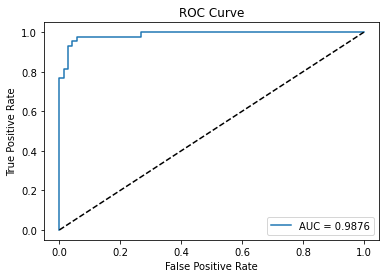

In [35]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [36]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.9204')

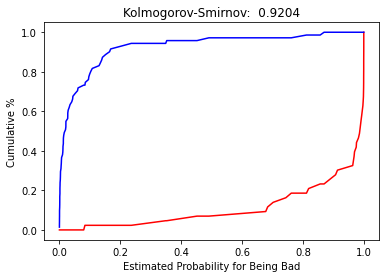

In [37]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

In [38]:
print(f'Input Data: {X_test.iloc[50][X_test.iloc[50]!=0].keys()}')
print(f'Target: {y_test.iloc[50]}')

Input Data: Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se',
       'smoothness_se', 'symmetry_se', 'symmetry_worst'],
      dtype='object')
Target: diagnosis_M    1
Name: 264, dtype: uint8


In [39]:
X_test.iloc[50][X_test.iloc[50]!=0]

radius_mean               0.869853
texture_mean              0.647006
smoothness_mean           0.064029
compactness_mean         -0.272730
symmetry_mean             0.202194
fractal_dimension_mean   -0.991984
texture_se               -0.868260
smoothness_se            -0.849361
symmetry_se              -1.102093
symmetry_worst            0.509996
Name: 264, dtype: float64